In [40]:
import pandas as pd

In [41]:
data_ss_train_df = pd.read_csv('data_smin_ss_train_csv')
data_ss_test_df = pd.read_csv('data_ss_test_csv')
data_ss_val_df = pd.read_csv('data_ss_val_csv')

In [42]:
data_ss_train_df

,Unnamed: 0,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remaining overs and balls,Remainder,Winner_num
0,0,-0.643491,0.670651,0.601874,-0.114034,-0.367329,-0.290906,1.607451,1.585879,0
1,1,-0.643491,0.670651,0.601874,-0.114034,-0.367329,-0.290906,1.567007,1.561594,0
2,2,-0.643491,0.670651,0.601874,-0.114034,-0.367329,-0.290906,1.546786,1.549451,0
3,3,-0.643491,0.670651,0.601874,-0.114034,-0.367329,-0.290906,1.506342,1.525166,0
4,4,-0.643491,0.670651,0.601874,-0.114034,-0.367329,-0.290906,1.486121,1.464454,0
...,...,...,...,...,...,...,...,...,...,...
288036,288036,0.302034,-0.073756,0.601874,1.055524,1.659558,1.371243,-1.405570,-1.380938,1
288037,288037,1.720323,-1.562571,-1.525800,-0.114034,-0.120935,0.381440,-1.708894,-1.716881,1
288038,288038,-0.170728,-0.073756,-0.083139,-1.283592,-0.031933,0.138307,0.475040,0.474810,1
288039,288039,-1.116254,0.856753,0.275274,-0.698813,-0.742092,-0.810383,1.486121,1.464454,1


In [43]:
def data_format(train_df, test_df, val_df, sample):
    train_df = train_df.drop(['Unnamed: 0'], axis=1)
    test_df = test_df.drop(['Unnamed: 0'], axis=1)
    val_df = val_df.drop(['Unnamed: 0'], axis=1)

    if sample!=None:
        train_df = train_df.sample(n=14402, replace=False, random_state=7, axis=0)
        test_df = test_df.sample(n=1351, replace=False, random_state=7, axis=0)
        val_df = val_df.sample(n=2702, replace=False, random_state=7, axis=0)

    X_train = train_df.drop('Winner_num',axis=1)
    y_train = train_df['Winner_num']

    X_test= test_df.drop('Winner_num',axis=1) 
    y_test = test_df['Winner_num']

    X_val= val_df.drop('Winner_num',axis=1) 
    y_val = val_df['Winner_num']
    return(X_train, X_test, X_val, y_train, y_test, y_val)

In [44]:
X_ss_train, X_ss_test, X_ss_val, y_ss_train, y_ss_test, y_ss_val = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, None)

In [45]:
#X_mm_train_sample, X_mm_test_sample, X_mm_val_sample, y_mm_train_sample, y_mm_test_sample, y_mm_val_sample = data_format(data_mm_train_df, data_mm_test_df, data_mm_val_df, 'sample')
X_ss_train_sample, X_ss_test_sample, X_ss_val_sample, y_ss_train_sample, y_ss_test_sample, y_ss_val_sample = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, 'sample')
#X_log_train_sample, X_log_test_sample, X_log_val_sample, y_log_train_sample, y_log_test_sample, y_log_val_sample = data_format(data_log_train_df, data_log_test_df, data_log_val_df, 'sample')

Neural Network

In [46]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

X_train_dim = X_ss_train.shape[1]

# Add input layer and hidden layers
model.add(layers.Dense(64, activation='relu', input_dim=X_train_dim))
model.add(layers.Dense(32, activation='relu'))

# Add output layer with softmax activation for multi-class classification
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                576       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2755 (10.76 KB)
Trainable params: 2755 (10.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Train the model
history = model.fit(X_ss_train, y_ss_train, epochs=30, batch_size=32, validation_data=(X_ss_val, y_ss_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_ss_test, y_ss_test)
print(f'Test accuracy: {test_acc}')

# You can use the model for predictions
predictions = model.predict(X_ss_test)

Epoch 1/30
8890/9002 [============================>.] - ETA: 0s - loss: 1.0790 - accuracy: 0.3359

KeyboardInterrupt: 

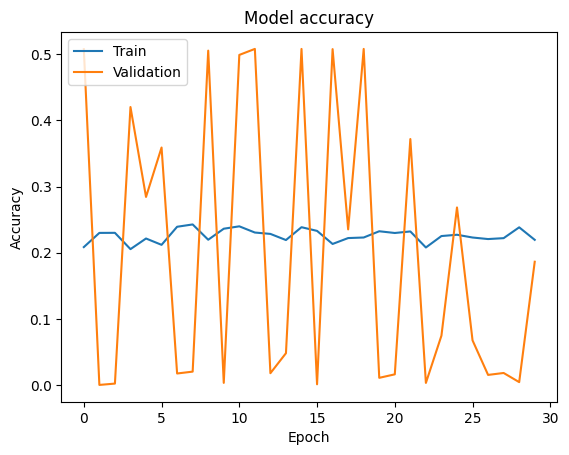

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [63]:
best_val_acc = 0
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have X_train, y_train, X_val, y_val as your data splits


# Define the model
def create_model(learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(input_dim,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(3, activation='softmax'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Set hyperparameter values to tune
learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epochs_values = [100]

# Assuming input_dim is the size of your input features
input_dim = X_ss_train.shape[1]

# Iterate over hyperparameters
for learning_rate in learning_rates:
    for epochs_value in epochs_values:
        print(f'Tuning learning_rate={learning_rate}, epochs={epochs_value}')
        
        # Create and compile the model
        model = create_model(learning_rate)
        
        # Use early stopping to prevent overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        
        # Train the model
        history = model.fit(X_ss_train, y_ss_train, epochs=epochs_value, batch_size=32,
                            validation_data=(X_ss_val, y_ss_val), callbacks=[early_stopping])
        
        # Evaluate on the validation set
        val_loss, val_acc = model.evaluate(X_ss_val, y_ss_val)
        print(f'Learning rate: {learning_rate}, Epoch: {epochs_value} Validation accuracy: {val_acc}')

        if val_acc> best_val_acc:
            best_val_acc = val_acc
            best_learning_rate = learning_rate
            best_epochs = epochs_value

# Choose the best hyperparameters based on validation performance
# Train the final model with the selected hyperparameters
final_model = create_model(learning_rate=best_learning_rate)
final_history = final_model.fit(X_ss_train, y_ss_train, epochs=best_epochs, batch_size=32, validation_data=(X_ss_val, y_ss_val))
print(f'Learning rate: {best_learning_rate}, Best epochs: {best_epochs}')


Tuning learning_rate=1e-06, epochs=10
Epoch 1/10
9002/9002 [==============================] - 14s 2ms/step - loss: 1.1597 - accuracy: 0.3539 - val_loss: 1.0066 - val_accuracy: 0.6116
Epoch 2/10
9002/9002 [==============================] - 30s 3ms/step - loss: 1.1122 - accuracy: 0.3879 - val_loss: 1.0068 - val_accuracy: 0.6214
Epoch 3/10
9002/9002 [==============================] - 30s 3ms/step - loss: 1.0825 - accuracy: 0.4138 - val_loss: 1.0020 - val_accuracy: 0.6011
Epoch 4/10
9002/9002 [==============================] - 35s 4ms/step - loss: 1.0639 - accuracy: 0.4318 - val_loss: 0.9952 - val_accuracy: 0.5901
Epoch 5/10
9002/9002 [==============================] - 38s 4ms/step - loss: 1.0493 - accuracy: 0.4457 - val_loss: 0.9871 - val_accuracy: 0.5881
Epoch 6/10
9002/9002 [==============================] - 30s 3ms/step - loss: 1.0387 - accuracy: 0.4556 - val_loss: 0.9809 - val_accuracy: 0.5868
Epoch 7/10
9002/9002 [==============================] - 39s 4ms/step - loss: 1.0300 - accura

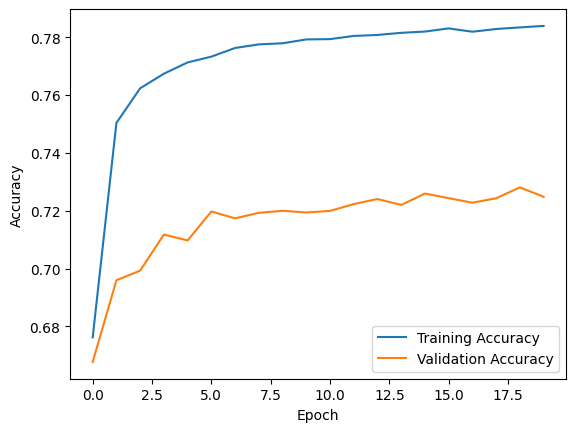

In [70]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
plt.plot(final_history.history['accuracy'], label='Training Accuracy')
plt.plot(final_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
final_model = create_model(learning_rate=best_learning_rate)
final_history = final_model.fit(X_ss_train, y_ss_train, epochs=best_epochs, batch_size=32, validation_data=(X_ss_val, y_ss_val))
print(f'Learning rate: {best_learning_rate}, Best epochs: {best_epochs}')

Epoch 1/20
9002/9002 [==============================] - 12s 1ms/step - loss: 0.7294 - accuracy: 0.6762 - val_loss: 0.6816 - val_accuracy: 0.6677
Epoch 2/20
9002/9002 [==============================] - 11s 1ms/step - loss: 0.5811 - accuracy: 0.7504 - val_loss: 0.6259 - val_accuracy: 0.6959
Epoch 3/20
9002/9002 [==============================] - 11s 1ms/step - loss: 0.5506 - accuracy: 0.7623 - val_loss: 0.6263 - val_accuracy: 0.6993
Epoch 4/20
9002/9002 [==============================] - 11s 1ms/step - loss: 0.5367 - accuracy: 0.7674 - val_loss: 0.5967 - val_accuracy: 0.7118
Epoch 5/20
9002/9002 [==============================] - 11s 1ms/step - loss: 0.5276 - accuracy: 0.7713 - val_loss: 0.6049 - val_accuracy: 0.7097
Epoch 6/20
9002/9002 [==============================] - 11s 1ms/step - loss: 0.5210 - accuracy: 0.7733 - val_loss: 0.5833 - val_accuracy: 0.7197
Epoch 7/20
9002/9002 [==============================] - 11s 1ms/step - loss: 0.5152 - accuracy: 0.7763 - val_loss: 0.5920 - val_ac

In [69]:
test_loss, test_acc = final_model.evaluate(X_ss_test, y_ss_test)
print(f'Test accuracy: {test_acc}')

845/845 [==============================] - 1s 780us/step - loss: 0.5788 - accuracy: 0.7277
Test accuracy: 0.7277403473854065


https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/#:~:text=in%20general%2C%20it%20is%20not,greater%20than%2010%5E%2D6.

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Should I use categorical crossentropy

NEW ATTEMPT

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the function to create the model
def create_model(hidden_layers, neurons, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for classification
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Assuming input_dim is the dimensionality of your input features
input_dim = X_ss_train.shape[1]

# Define hyperparameter search space
param_grid = {
    'hidden_layers': [1, 2, 3],
    'neurons': [64, 128, 256],
    'dropout_rate': [0.2, 0.5],
    'learning_rate': [0.0001, 0.001, 0.01]
}

# Track the best model and its performance
best_model = None
best_epochs = float('inf')
best_accuracy = 0.0

# Iterate over hyperparameter combinations
for hidden_layers in param_grid['hidden_layers']:
    for neurons in param_grid['neurons']:
        for dropout_rate in param_grid['dropout_rate']:
            for learning_rate in param_grid['learning_rate']:
                print(f"Training model with {hidden_layers} hidden layers, {neurons} neurons, "
                      f"{dropout_rate} dropout, and {learning_rate} learning rate.")
                
                # Create the model
                model = create_model(hidden_layers, neurons, dropout_rate, learning_rate)
                
                # Set up early stopping
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                
                # Train the model
                history = model.fit(X_ss_train, y_ss_train, epochs=100, batch_size=32,
                                    validation_data=(X_ss_val, y_ss_val), callbacks=[early_stopping])
                
                # Get the number of epochs it took for early stopping
                epochs = len(history.history['loss'])
                print(f"Early stopped after {epochs} epochs.")
                
                # Evaluate on validation set
                _, accuracy = model.evaluate(X_ss_val, y_ss_val)
                print(f"Validation accuracy: {accuracy}\n")
                
                # Check if this model is the best so far
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_epochs = epochs

print(f"Best model achieved {best_accuracy} accuracy on the validation set after {best_epochs} epochs.")


Training model with 1 hidden layers, 64 neurons, 0.2 dropout, and 0.0001 learning rate.
Epoch 1/100
9002/9002 [==============================] - 10s 1ms/step - loss: 0.9281 - accuracy: 0.5528 - val_loss: 0.8773 - val_accuracy: 0.6238
Epoch 2/100
9002/9002 [==============================] - 10s 1ms/step - loss: 0.8614 - accuracy: 0.6060 - val_loss: 0.8503 - val_accuracy: 0.6279
Epoch 3/100
9002/9002 [==============================] - 10s 1ms/step - loss: 0.8235 - accuracy: 0.6327 - val_loss: 0.8180 - val_accuracy: 0.6427
Epoch 4/100
9002/9002 [==============================] - 10s 1ms/step - loss: 0.7956 - accuracy: 0.6519 - val_loss: 0.8063 - val_accuracy: 0.6431
Epoch 5/100
9002/9002 [==============================] - 10s 1ms/step - loss: 0.7742 - accuracy: 0.6661 - val_loss: 0.7873 - val_accuracy: 0.6497
Epoch 6/100
9002/9002 [==============================] - 10s 1ms/step - loss: 0.7555 - accuracy: 0.6779 - val_loss: 0.7753 - val_accuracy: 0.6532
Epoch 7/100
9002/9002 [=============

In [72]:
test_loss, test_acc = best_model.evaluate(X_ss_test, y_ss_test)
print(f'Test accuracy: {test_acc}')

845/845 [==============================] - 1s 978us/step - loss: 0.1553 - accuracy: 0.9358
Test accuracy: 0.9357560276985168
